**CS596 - Machine Learning**
<br>
Date: **7 September 2020**


Title: **Seminar 1: Linear Regression**
<br>
Speaker: **Dr. Shota Tsiskaridze**
<br>
Teaching Assistant: **Levan Sanadiradze**

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

<h2 align="center">Linear Regression</h2>

<h3 align="center">Sinusoidal Signal</h3>

- Lets start with an example discussed in **Lecture 2** and reproduce it.


- For this we will use **synthetic data**:

  **Synthetic data** is **any production data applicable to a given situation that are not obtained by direct measurement** according to the McGraw-Hill Dictionary of Scientific and Technical Terms.



- First, we will **generate dataset** and then we use **linear regression model** to **fit** the **dataset**.



- Remember, that **regression model**:
  - **involves** the following **components**:
    - The **unknown parameters** denoted as a vector $\theta = [\theta_1, \theta_2, \cdots,  \theta_N]$;
    - The **independent variables** denoted as an array $\mathbf{X} = [X_1, X_2, \cdots,  X_M]$.
    - The **dependent variable**, or **observed variables**, denoted as a vector $\mathbf{y} = [y_1, y_2, \cdots, y_M]$.
    - The **error term** defined as a noise and denoted as a vector $\mathbf{\varepsilon} = [\varepsilon_1, \varepsilon_2, \cdots, \varepsilon_M]$.
  
  - **proposes** that $y_{i}$ is a function of $X_{i}$, $\boldsymbol{\theta}$ and $\varepsilon_i$, representing an **additive error term**:
  
  $$y_i = f(X_i, \boldsymbol{\theta}) + \varepsilon_i.$$

  - **estimates**  the function $\hat{f}(X_i, \boldsymbol{\theta})$ that $\hat{y_i} = \hat{f}(X_i, \boldsymbol{\theta})$ most closely **fits** the data $X_i$.
  

- **Note**: We will **import** the necesarry **libraries** as needed.

In [95]:
# Here all imported libraries are grouped together

#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

#from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import PolynomialFeatures

##from matplotlib import animation, rc
##from IPython.display import HTML

In [3]:
import numpy as np

- Let's define our function of interest, referred below as **true function**, i.e. $f(x) = \sin 2\pi x$.

In [4]:
f = lambda x:  np.sin(2*np.pi*x)

- Lets generate $M$ data points. For this:
  - Introduce $X$ axis that is defined on interval $[a,b]$; 
  - Using $f(x)$ generate **true values** $y_{true}$ for each $X$;
  - Generate the **normally distributed noise** $\varepsilon$;
  - Create **observed data points** $y_{obs}$ by **adding noise** $\varepsilon$ to the **true values** $y_{true}$.

In [5]:
a = 0
b = 1
M = 11
X = np.linspace(a, b, num=M)
print(X)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [6]:
y_true = [f(i) for i in X]
print(y_true)    

[0.0, 0.5877852522924731, 0.9510565162951535, 0.9510565162951535, 0.5877852522924732, 1.2246467991473532e-16, -0.5877852522924734, -0.9510565162951535, -0.9510565162951536, -0.5877852522924734, -2.4492935982947064e-16]


In [22]:
e_mean = 0
e_var = 0.1
e = np.random.normal(e_mean, e_var, size=M)
print(e)

[ 0.16097293 -0.04686721  0.23898061  0.05161052  0.01000256  0.02056762
 -0.12241159 -0.07485449  0.0783495  -0.18469272  0.12575043]


In [23]:
y_obs = y_true + e
print(y_obs)

[ 0.16097293  0.54091805  1.19003712  1.00266704  0.59778782  0.02056762
 -0.71019684 -1.02591101 -0.87270702 -0.77247797  0.12575043]


In [9]:
type(X), type(y_obs), type(eps)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

- Now, lets plot what we get.

- For this we will need to import matplotlib library.

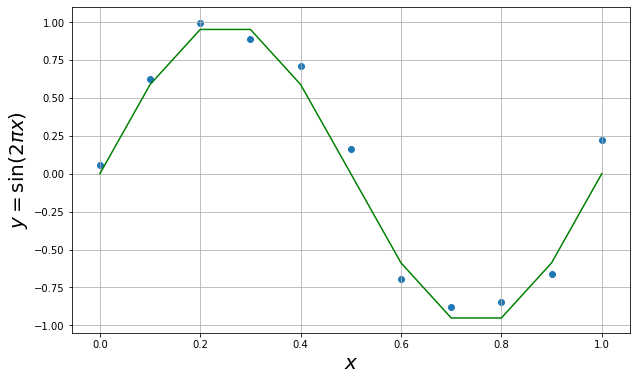

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y_obs)
plt.plot   (X, f(X), 'g')
plt.xlabel ("$x$",   fontsize=20)
plt.ylabel ("$y=\sin(2\pi x)$", fontsize=20)
plt.grid()

- Lets crate another **linspace** to plot **true function** in more nice way.

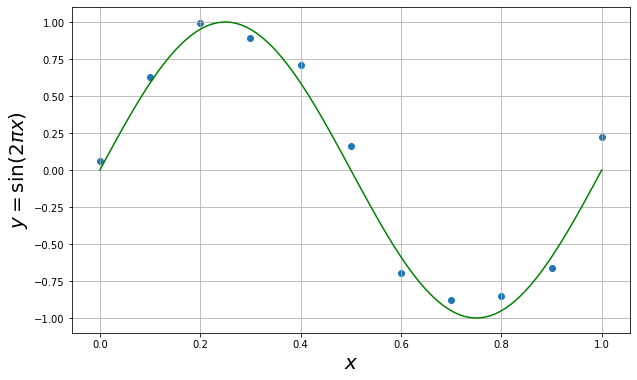

In [11]:
linspaceX = np.linspace(0, 1, num=100)

plt.figure (figsize=(10, 6))
plt.scatter(X, y_obs)
plt.plot   (linspaceX, f(linspaceX), 'g')
plt.xlabel ("$x$",   fontsize=20)
plt.ylabel ("$y=\sin(2\pi x)$", fontsize=20)
plt.grid()
#plt.savefig("Output_01.png")

<h3 align="center">Fitting with Linear Function</h3>


- Let's **define** regression model and then **fit** the above dataset.

- For simplicity, lets start with a **linear function**:

$$\hat{f_1}(\mathbf{x}, \theta) = \theta_0 + \theta_1 \cdot x_1.$$

In [12]:
# add dummy column to the dataset for the bias
X_dummy = np.c_[np.ones(X.shape[0]), X]
print(X_dummy)

[[1.  0. ]
 [1.  0.1]
 [1.  0.2]
 [1.  0.3]
 [1.  0.4]
 [1.  0.5]
 [1.  0.6]
 [1.  0.7]
 [1.  0.8]
 [1.  0.9]
 [1.  1. ]]


In [13]:
from sklearn.linear_model import LinearRegression

# defining linear regression model
# fit_intercept=True means disabling bias term
model = LinearRegression(fit_intercept=False)

# fitting the model using Ordinary Least Square
model.fit(X_dummy, y_obs)

# display learned weights: 𝜃_0 and 𝜃_1
coef = model.coef_
print(coef)

[ 0.72561646 -1.34578254]


In [14]:
# generate predictions
y_pred = model.predict(X_dummy)
print(y_pred)

[ 0.72561646  0.59103821  0.45645995  0.3218817   0.18730344  0.05272519
 -0.08185306 -0.21643132 -0.35100957 -0.48558783 -0.62016608]


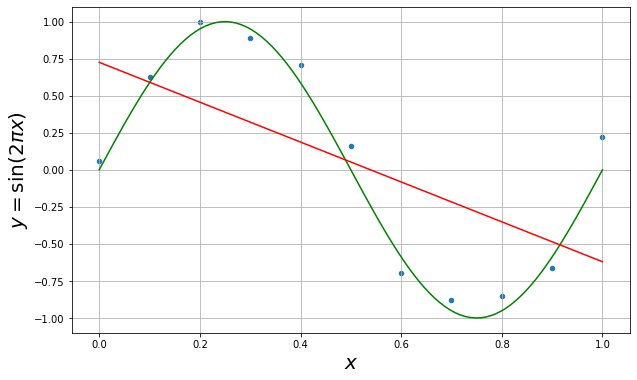

In [17]:
# plot learned model

plt.figure (figsize=(10, 6))
plt.scatter(X, y_obs, s=20)
plt.plot   (linspaceX, f(linspaceX), 'g')
plt.plot   (X, y_pred, 'r')
plt.xlabel ("$x$",   fontsize=20)
plt.ylabel ("$y=\sin(2\pi x)$", fontsize=20)
plt.grid()

 - **Question**: Is it a **good** fit or **bad** fit, and **Why**?


 - Obviously, this model is **too simple** and doesn't have enough **power** to capture the dependences.

<h3 align="center">Fitting with Polinomial Function</h3>

- Let's introduce **additional features** to our regression model. 

- We gonna use **polynomial features** up to **10-th degree**:


  $$\hat{f_{10}}(x)=\theta_0 + \theta_1 \cdot x + \theta_2 \cdot x^2 + \theta_3 \cdot x^3 + \theta_4 \cdot x^4 + \theta_5 \cdot x^5 + \theta_6 \cdot x^6 + \theta_7 \cdot x^7 + \theta_8 \cdot x^8 + \theta_9 \cdot x^9 +\theta_{10} \cdot x^{10}.$$


- **Note**: despite the fact that we add polynomial features, **model stays linear** because linearity is relative to weights and not features.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

# define the helper class
poly = PolynomialFeatures(degree=10, include_bias=True)

# create features
X_dummy = poly.fit_transform(X.reshape(-1, 1))
print(X_dummy[:1])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
# fitting again with new feature set
model.fit(X_dummy, y_obs)

# display learned weights
coef = model.coef_
print(coef)

[ 5.85493487e-02  3.67198911e+01 -9.33653521e+02  1.14153786e+04
 -7.45764388e+04  2.85856016e+05 -6.74531027e+05  9.90026722e+05
 -8.79296860e+05  4.32119116e+05 -9.01158113e+04]


In [20]:
# generate predictions
y_pred = model.predict(X_dummy)
print(y_pred)

[ 0.05854935  0.62639996  0.99441254  0.89022318  0.70776254  0.16257604
 -0.69466749 -0.87602908 -0.84823271 -0.66269498  0.22167776]


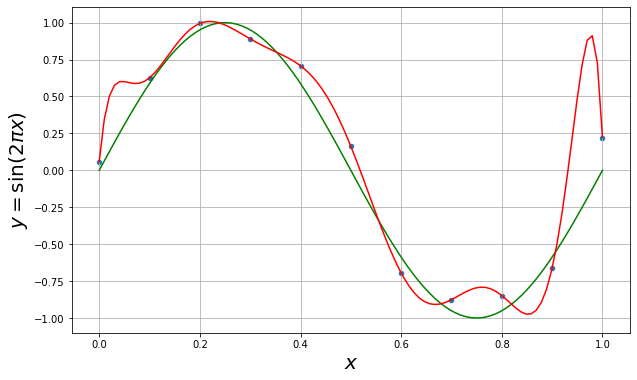

In [21]:
# define the helper class to plot fited polinomial nicely
polynomial = np.poly1d(coef[::-1])

plt.figure (figsize=(10, 6))
plt.scatter(X, y_obs, s=20)
plt.plot   (linspaceX, f(linspaceX), 'g')
plt.plot   (linspaceX, polynomial(linspaceX), 'r')
plt.xlabel ("$x$",   fontsize=20)
plt.ylabel ("$y=\sin(2\pi x)$", fontsize=20)
plt.grid()


 - **Question**: Is it a **good** fit or **bad** fit, and **Why**?

- **Before we answer on this question, lets bring all together in one simple method!**

In [96]:
def generate_and_fit(a, b, M, e_mean, e_var, degree):

    # define true function
    f = lambda x:  np.sin(2*np.pi*x)

    # generate the dataset
    X = np.linspace(a, b, num=M)
    y_true = [f(i) for i in X]

    # generate the normally distributed noise
    e = np.random.normal(e_mean, e_var, size=M)
    
    # create true observations by adding noise
    y_obs = y_true + e

    # define the helper class
    poly = PolynomialFeatures(degree=degree, include_bias=True)

    # add dummy column to the dataset for the bias
    X_dummy = poly.fit_transform(X.reshape(-1, 1))
    
    model = LinearRegression(fit_intercept=False) 
 
    #fitting the model
    model.fit(X_dummy, y_obs)
    
    # generate predictions
    y_pred = model.predict(X_dummy)

    # define the helper class to plot fited polinomial nicely
    polynomial = np.poly1d(model.coef_[::-1])

    plt.scatter(X, y_obs, s=20, c="b")
    plt.plot   (linspaceX, f(linspaceX), 'g')
    plt.plot   (linspaceX, polynomial(linspaceX), "r")
    plt.xlabel ("$x$",   fontsize=20)
    plt.ylabel ("$f(x)=\sin(2\pi x)$", fontsize=20)
    plt.grid()

- Let's plot everything together using this method:

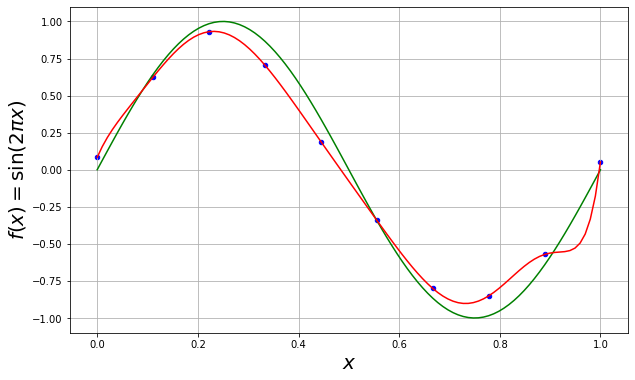

In [88]:
plt.figure (figsize=(10, 6))

generate_and_fit(0, 1, 10, 0, 0.1, 10)

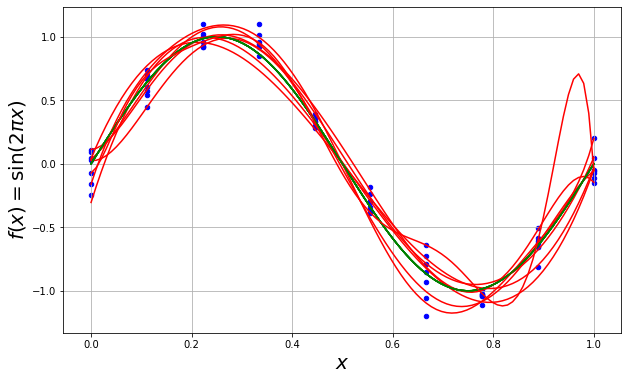

In [89]:
plt.figure (figsize=(10, 6))

for i in range(3,10):
    generate_and_fit(0, 1, 10, 0, 0.1, i)

- It looks unpleasant, isn't it?


- Let's visualize it more beautifully using **celluloid library** and **matplotlib animation**:

In [90]:
pip install celluloid

Note: you may need to restart the kernel to use updated packages.


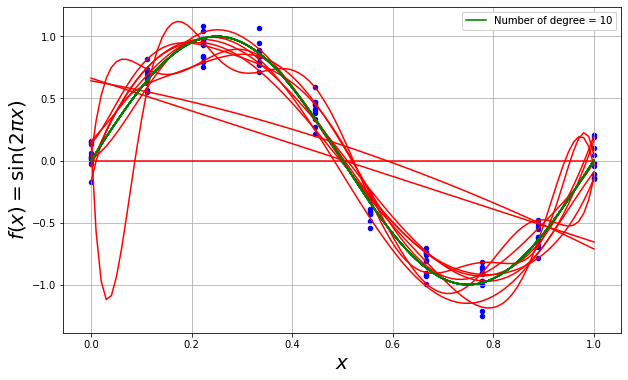

In [91]:
from celluloid import Camera

fig = plt.figure(figsize=(10, 6))

camera = Camera(fig)

for i in range(0, 11):
    generate_and_fit(0, 1, 10, 0, 0.1, i)
    t = plt.plot  (linspaceX, f(linspaceX), 'g')
    plt.legend(t, [f"Number of degree = {i}"])
    camera.snap()

- Still unpleasant, isn't it?

- Lets add some animation:

In [100]:
# to run the animation in Google Colab use this code

from matplotlib import animation, rc
from IPython.display import HTML

animation = camera.animate(interval=500)
rc('animation', html='jshtml')
animation

- Let's not generate and fit data using one fixed number of degree of the polynomial:    

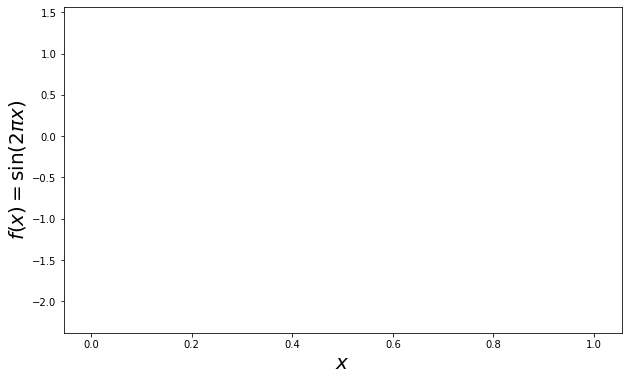

In [103]:
fig = plt.figure(figsize=(10, 6))
camera = Camera(fig)
degree = 10
for i in range(0, 20):
    generate_and_fit(0, 1, 10, 0, 0.1, degree)
    t = plt.plot  (linspaceX, f(linspaceX), 'g')
    plt.legend(t, [f"Generated sample # {i+1}"])
    camera.snap()

animation = camera.animate(interval=500)
rc('animation', html='jshtml')
animation

<h3 align="center">Conclusions</h3>

- **Very simple** models have **poor performance** due to lack of expressive power to learn data distribution.
- **Very complex** models have **poor performance** due to excessive expressive power leading to **fitting noise** instead of the real data.


- In other words, the **first one** is **Underfit** and the **second one** is **Overfit** the our dataset.

<h1 align="center">End of Seminar</h1>